In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

d2_path = './DataSet/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams['font.family'] = 'D2Coding'

data = pd.read_csv('./DataSet/김해공항.csv', encoding='EUC-KR')

In [2]:
data

,출입국항별,내외국인별,성별,항목,시점,데이터
0,김해(김해공항),내국인,남자,입국자,2013,16538
1,김해(김해공항),내국인,남자,입국자,2014,17240
2,김해(김해공항),내국인,남자,입국자,2015,16000
3,김해(김해공항),내국인,남자,입국자,2016,16759
4,김해(김해공항),내국인,남자,입국자,2017,17307
...,...,...,...,...,...,...
83,김해(김해공항),외국인,여자,출국자,2019,19623
84,김해(김해공항),외국인,여자,출국자,2020,8330
85,김해(김해공항),외국인,여자,출국자,2021,1558
86,김해(김해공항),외국인,여자,출국자,2022,4596


In [3]:
new_data = data.groupby('시점')['데이터'].sum().reset_index()
new_data

,시점,데이터
0,2013,103544
1,2014,105030
2,2015,111907
3,2016,123220
4,2017,129843
5,2018,134832
6,2019,153289
7,2020,50159
8,2021,7468
9,2022,31853


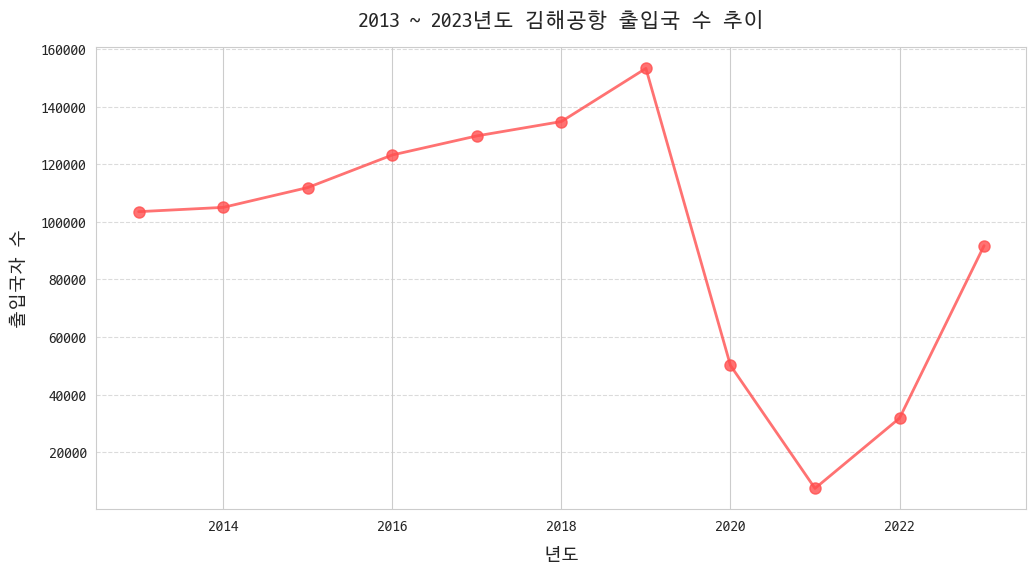

In [4]:
import matplotlib.font_manager as fm
import seaborn as sns

sns.set_style("whitegrid")

d2_path = './DataSet/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams['font.family'] = 'D2Coding'

plt.figure(figsize=(12,6))
plt.plot(new_data['시점'], new_data['데이터'], marker = 'o', linestyle = '-', color = '#ff4f4f', markersize = 8, linewidth = 2, alpha = 0.8)

plt.title('2013 ~ 2023년도 김해공항 출입국 수 추이', fontsize = 15, fontweight = 'bold', pad = 15)
plt.xlabel('년도', fontsize = 13, fontweight = 'bold', labelpad = 10)
plt.ylabel('출입국자 수', fontsize = 13, fontweight = 'bold', labelpad = 10)

plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 인사이트

### 1. 2013~2019년까지 꾸준한 증가

    - 출입국자 수가 매년 증가하는 추세를 보임.
    - 특히 2017~2019년 사이에 급격한 증가가 보임 → 국제선 노선 확대, 해외여행 증가, 항공사 취항 확대 등이 원인일 가능성.
    - 2019년 최고치 도달 → 김해공항의 국제 항공편 활성화와 여행 수요 증가.
    - 2020년 급격한 감소(코로나19 영향)

### 2. 2019년 → 2020년 사이에 급격한 하락
    - 이 시기는 코로나19 팬데믹이 시작된 시점으로, 국제선 운항 제한 및 여행 제한 조치가 시행됨.
    - 전 세계적으로 항공업계가 큰 타격을 입었으며, 김해공항도 마찬가지로 큰 감소.
    - 2021년 바닥, 이후 회복세

    - *2021년 출입국자 수 최저치 → 팬데믹 영향이 극대화된 시기.*
    
### 3. 2022년부터 다시 증가
    - 해외여행 제한이 점진적으로 해제되면서 항공편 운항이 재개됨.
    - 여행 심리가 회복되면서 이용객 수가 증가.
    - 2023년 가파른 회복세 → 코로나 이전 수준으로 회복될 가능성이 높아짐.

In [5]:
new_data

,시점,데이터
0,2013,103544
1,2014,105030
2,2015,111907
3,2016,123220
4,2017,129843
5,2018,134832
6,2019,153289
7,2020,50159
8,2021,7468
9,2022,31853


In [6]:
X = new_data["시점"].values.reshape(-1, 1)
Y = new_data["데이터"].values

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [8]:
future_years = np.array(range(new_data["시점"].max() + 1, new_data["시점"].max() + 6)).reshape(-1, 1)
future_predictions = model.predict(future_years)

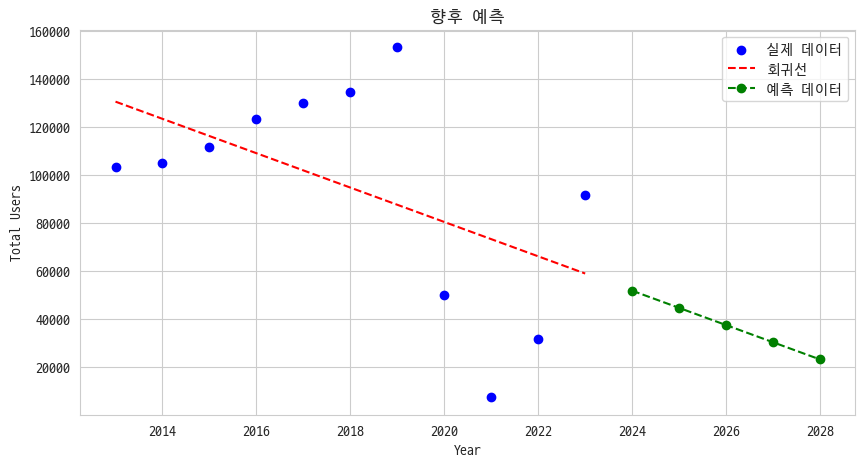

In [9]:
plt.figure(figsize = (10, 5))
plt.scatter(X, Y, label="실제 데이터", color="blue")
plt.plot(X, model.predict(X), color="red", linestyle="dashed", label="회귀선") 
plt.plot(future_years, future_predictions, color="green", marker="o", linestyle="dashed", label="예측 데이터")

plt.xlabel("Year")
plt.ylabel("Total Users")
plt.legend()
plt.title("향후 예측")
plt.show()

# 인사이트

### 1. 이전 데이터에 코로나19 영향이 큼
    - 2019년까지는 증가하는 추세였지만, 2020년~2021년에 코로나19로 인해 급감했음.
    - 선형 회귀 모델은 단순 직선이므로 코로나 이후의 감소 패턴을 그대로 연장함.
    - 회귀선이 전체적인 추세를 제대로 반영하지 못함

### 2. 해결

    - 코로나 이전(2013~2019) 데이터로만 회귀 모델 학습
        -> 팬데믹 영향을 배제하고, 정상적인 공항 이용 추세를 예측 가능.
    - 비선형 모델(다항 회귀) 사용
        -> 이용자 수 변화가 직선이 아니라 곡선(이차 함수 형태)로 증가하는 패턴을 반영하도록 개선.
    - 시계열 모델(ARIMA) 적용
        -> 연도별 증가/감소 패턴을 반영해 더 정확한 예측 가능